# Supervised Machine Learning
## Intro
- $(x_{i},y_{i}) \propto p(x,y), i.i.d$
- $x_{i} \in R^{p}$ -> $p$ is the number of features
- $y_{i} \in R$
- learn $f(x_{i}) \approx y_{i}$, such that $f(x) \approx y$ for new $(x,y) \propto p(x,y)$
- Classification -> Predict a class label
  - Binary: Two classes
  - Multiclass: Many classes
- Regression -> Predict a continuous number

## Generalization
- Fit a model and predict on new, unseen data that comes from the same distribution as the training data
  - If a model is able to predict well on unseen data, it generalizes
- If we allow to build very complex models, it can always be as accurate as we can on the training set
- We expect simple models to generalize better to new data
- Overfitting -> Building a model that is too complex for the ammount of information we have
- Underfitting -> Choosing a too simple model
- The larger the variety of data points in your dataset, the more complex the model can be without overfitting

In [1]:
%matplotlib inline
from preamble import *

## KNN
- To find a prediction for a new data point, finds the closest data points in the training data
- For multiclass classification -> How many neighbors belong to each class and again predict the most common class
- Using k = 1 leads to a boundary that follow training data closely
- Using large k leads to a more smooth decision boundary
- Analysis
  - Strenghts:
    - Very easy to understand/implement
    - Reasonable performance with few adjustments
    - Good baseline
  - Weaknessess:
    - Slow to predict new data
    - Does not perform well with datasets with many features, sparse features
  - Parameters:
    - K: Number of neighbors 
    - Distance: Normally euclidean, but can vary

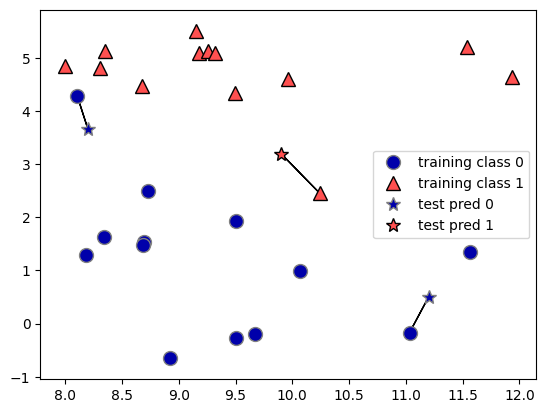

In [2]:
mglearn.plots.plot_knn_classification(n_neighbors=1) # Using to classify the point the nearest data point

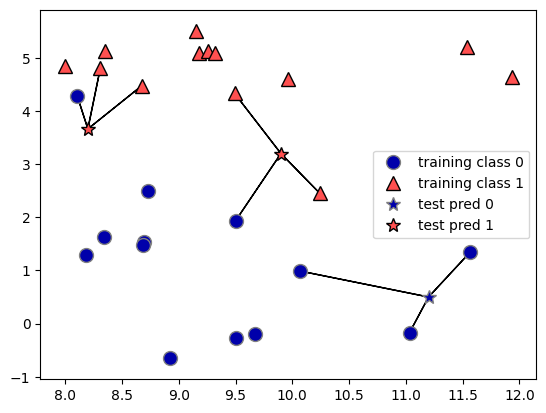

In [3]:
mglearn.plots.plot_knn_classification(n_neighbors=3) # Using to classify the point the nearest data point

In [4]:
from sklearn.model_selection import train_test_split
X, y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [5]:
print("Test set predictions: {}".format(clf.predict(X_test)))
print("Test set accuracy: {:.2f}".format(clf.score(X_test, y_test)))

Test set predictions: [1 0 1 0 1 0 0]
Test set accuracy: 0.86


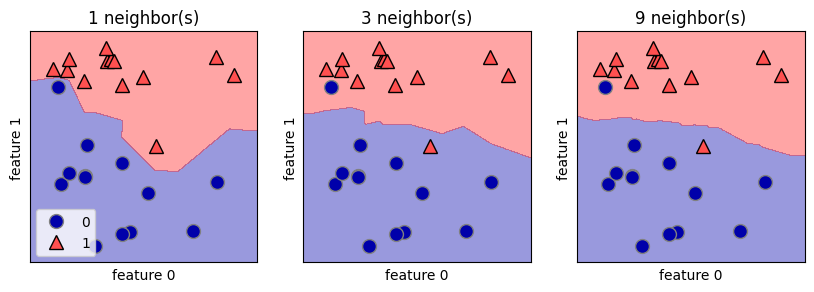

In [6]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate
    # and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature 0")
    ax.set_ylabel("feature 1")
axes[0].legend(loc=3)

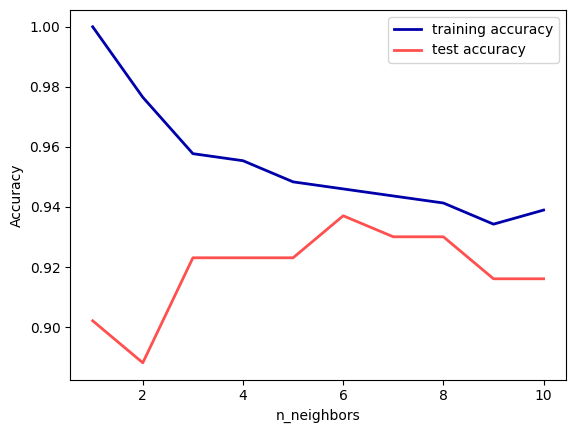

In [7]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
# try n_neighbors from 1 to 10
neighbors_settings = range(1, 11)

for n_neighbors in neighbors_settings:
    # build the model
    clf = KNeighborsClassifier(n_neighbors=n_neighbors)
    clf.fit(X_train, y_train)
    # record training set accuracy
    training_accuracy.append(clf.score(X_train, y_train))
    # record generalization accuracy
    test_accuracy.append(clf.score(X_test, y_test))
    
plt.plot(neighbors_settings, training_accuracy, label="training accuracy")
plt.plot(neighbors_settings, test_accuracy, label="test accuracy")
plt.ylabel("Accuracy")
plt.xlabel("n_neighbors")
plt.legend()
# Number of neighbors too low -> Overfitting
# Number of neighbors too high -> Underfitting

## Linear Models
- Regression:
  - $\hat{y} = w_{0}x_{0} + w_{1}x_{1} + ... + w_{p}x_{p} + b$, where
    - $x_{i}$: Features
    - $w_{i}$: Weights
    - $b$: Bias/Intercept
  - Prediction can be seen as
    - Line for a single feature
    - Plane for two features
    - Hyperplane for $p$ features
  - Can be powerfull for datasets with many features.
  - **If you have more features than training points, any target $y$ can be perfectly modeled by a linear function**

w[0]: 0.393906  b: -0.031804


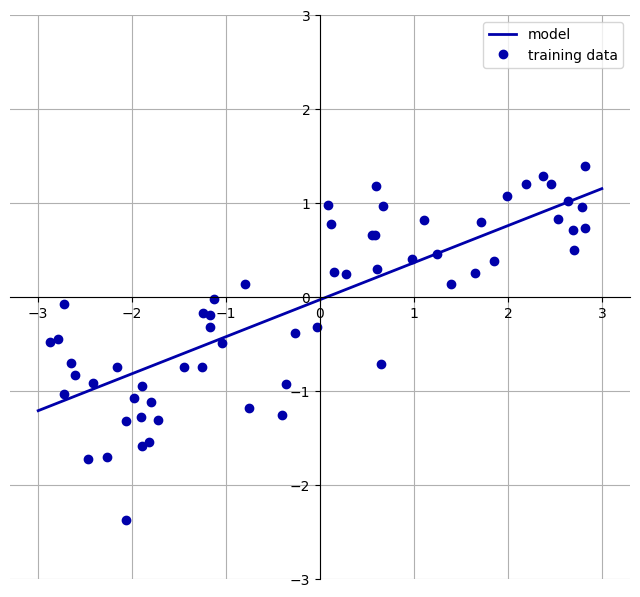

In [8]:
mglearn.plots.plot_linear_regression_wave()

### Linear Regression (OLS)
- Finds $w$ and $b$ that minimizes the $MSE$ between the prediction and the target
- $R^{2}$ coefficient of determination, is a meas‐
ure of goodness of a prediction for a regression model, and yields a score between 0
and 1.
- In high dimensional data, there is a higher chance of overfitting. 

In [9]:
from sklearn.linear_model import LinearRegression
X, y = mglearn.datasets.make_wave(n_samples=60)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
lr = LinearRegression().fit(X_train, y_train)
print("lr.coef_: {}".format(lr.coef_))
print("lr.intercept_: {}".format(lr.intercept_))

lr.coef_: [0.394]
lr.intercept_: -0.03180434302675973


In [10]:
print("Training set score: {:.2f}".format(lr.score(X_train, y_train))) # Uses R^{2}
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))

Training set score: 0.67
Test set score: 0.66


In [11]:
X, y = mglearn.datasets.load_extended_boston()
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
lr = LinearRegression().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lr.score(X_test, y_test)))


(506, 104)
Training set score: 0.95
Test set score: 0.61


### Ridge Regression
- Uses $L_{2}$ regularization, so it constrais the weights $w$. Helps to control the magnitude of the coefficients restricting them to be close to 0.
- Regularization means explictly restricting a model to avoid overfitting
- Penalizes the euclidean lenght of $w$.
- Tradeoff between performance on the training set and simplicity. Can be specified by parameter $\alpha$.
  - Higher $\alpha$ -> More regularization
  - Lower $\alpha$ -> Less regularization

In [12]:
from sklearn.linear_model import Ridge
ridge = Ridge().fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge.score(X_test, y_test)))

Training set score: 0.89
Test set score: 0.75


In [13]:
ridge10 = Ridge(alpha=10).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge10.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge10.score(X_test, y_test)))

Training set score: 0.79
Test set score: 0.64


In [14]:
ridge01 = Ridge(alpha=0.1).fit(X_train, y_train)
print("Training set score: {:.2f}".format(ridge01.score(X_train, y_train)))
print("Test set score: {:.2f}".format(ridge01.score(X_test, y_test)))

Training set score: 0.93
Test set score: 0.77


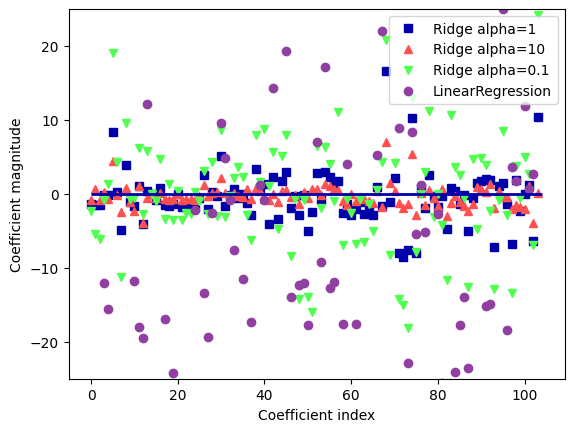

In [15]:
plt.plot(ridge.coef_, 's', label="Ridge alpha=1")
plt.plot(ridge10.coef_, '^', label="Ridge alpha=10")
plt.plot(ridge01.coef_, 'v', label="Ridge alpha=0.1")
plt.plot(lr.coef_, 'o', label="LinearRegression")
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.hlines(0, 0, len(lr.coef_))
plt.ylim(-25, 25)
plt.legend()


### Lasso
- Regularization with $L_{1}$ norm
- Can cause some coefficients to be exactly 0.
- Can be seen as automatic feature selection
- Lasso might be a better choice when the number of features is really large and expect only few of them to be important
- Ridge normally first choice
- Elastic Net -> Combines both L1 and L2 regularization

In [16]:
from sklearn.linear_model import Lasso
lasso = Lasso().fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso.coef_ != 0)))

Training set score: 0.29
Test set score: 0.21
Number of features used: 4


In [17]:
lasso001 = Lasso(alpha=0.01, max_iter=100000).fit(X_train, y_train)
print("Training set score: {:.2f}".format(lasso001.score(X_train, y_train)))
print("Test set score: {:.2f}".format(lasso001.score(X_test, y_test)))
print("Number of features used: {}".format(np.sum(lasso001.coef_ != 0)))

Training set score: 0.90
Test set score: 0.77
Number of features used: 33


### Linear models for classification
- The decision boundary is a linear function of the input
- SVMs and Logistic Regression
- Parameter C
  - High C: Tries to fit the training data as best as possible. Using this causes the algorithm to try to adjust the importance of each individual point to be classified correctly
  - Low C: Coefficients near 0. Using this cause the algorithm to try to adjust to the majority of data points
- Strenghts
  - Fast to train and fast to predict
  - Scale to very large datasets and sparse data
  - For large data
    - Change LR solver to 'sag'
    - SGDClassifier and SGDRegressor
  - Easy to interpret
- Weaknesses:
  - If correlated features, coefficients are hard to interpret
  - Not that good in low dimensional space
- Parameters:
  - Alpha and C: Regularizers. Searched for in logarithmic scale

c:\Users\Gabriel\mambaforge\envs\'iml'\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Gabriel\mambaforge\envs\'iml'\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


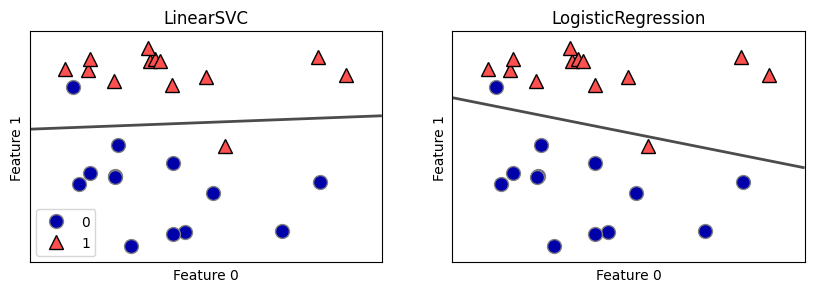

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
# By default, both apply L2 regularization
X, y = mglearn.datasets.make_forge()
fig, axes = plt.subplots(1, 2, figsize=(10, 3))
for model, ax in zip([LinearSVC(), LogisticRegression()], axes):
 clf = model.fit(X, y)
 mglearn.plots.plot_2d_separator(clf, X, fill=False, eps=0.5,
 ax=ax, alpha=.7)
 mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
 ax.set_title("{}".format(clf.__class__.__name__))
 ax.set_xlabel("Feature 0")
 ax.set_ylabel("Feature 1")
axes[0].legend()

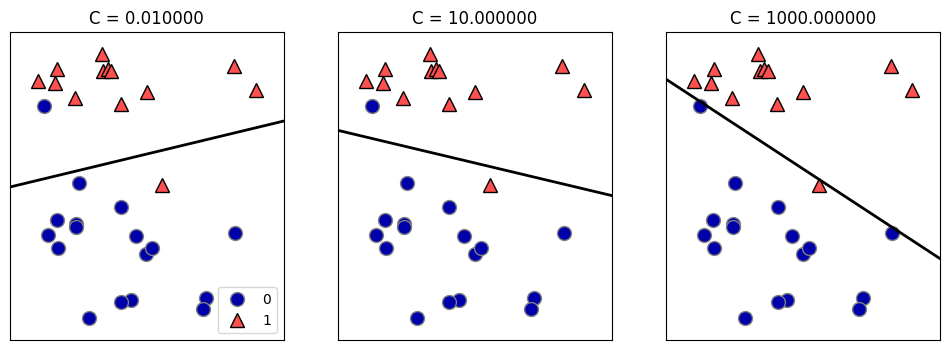

In [19]:
mglearn.plots.plot_linear_svc_regularization()

In [20]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, stratify=cancer.target, random_state=42)
logreg = LogisticRegression(max_iter=3000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

Training set score: 0.958
Test set score: 0.958


In [21]:
logreg100 = LogisticRegression(C=100,max_iter=5000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg100.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg100.score(X_test, y_test)))

Training set score: 0.984
Test set score: 0.965


In [22]:
logreg001 = LogisticRegression(C=0.01,max_iter=3000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg001.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg001.score(X_test, y_test)))

Training set score: 0.953
Test set score: 0.951


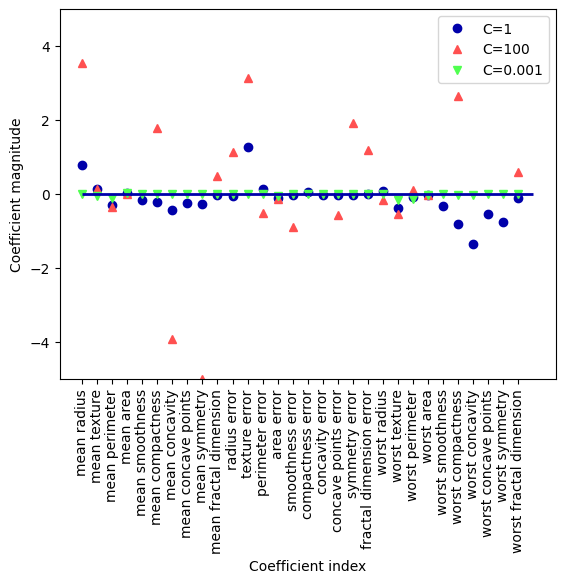

In [23]:
plt.plot(logreg.coef_.T, 'o', label="C=1")
plt.plot(logreg100.coef_.T, '^', label="C=100")
plt.plot(logreg001.coef_.T, 'v', label="C=0.001")
plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
plt.hlines(0, 0, cancer.data.shape[1])
plt.ylim(-5, 5)
plt.xlabel("Coefficient index")
plt.ylabel("Coefficient magnitude")
plt.legend()

Training accuracy of l1 logreg with C=0.001: 0.91
Test accuracy of l1 logreg with C=0.001: 0.92
Training accuracy of l1 logreg with C=1.000: 0.96
Test accuracy of l1 logreg with C=1.000: 0.96
Training accuracy of l1 logreg with C=100.000: 0.99
Test accuracy of l1 logreg with C=100.000: 0.98


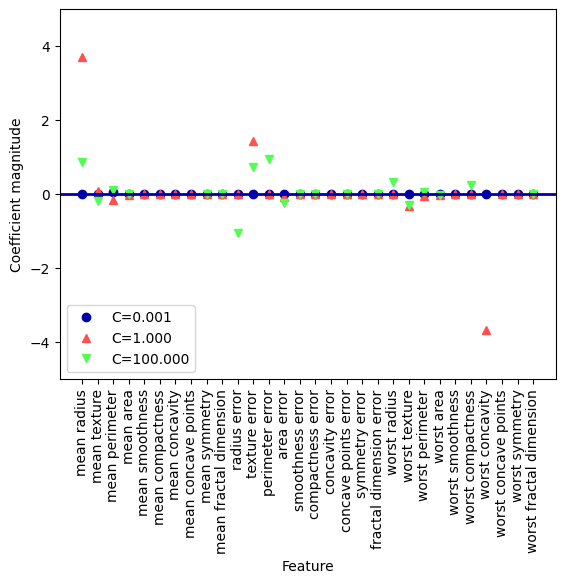

In [24]:
for C, marker in zip([0.001, 1, 100], ['o', '^', 'v']):
    lr_l1 = LogisticRegression(C=C, solver='liblinear', penalty="l1").fit(X_train, y_train)
    print("Training accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_train, y_train)))
    print("Test accuracy of l1 logreg with C={:.3f}: {:.2f}".format(
          C, lr_l1.score(X_test, y_test)))
    plt.plot(lr_l1.coef_.T, marker, label="C={:.3f}".format(C))

plt.xticks(range(cancer.data.shape[1]), cancer.feature_names, rotation=90)
xlims = plt.xlim()
plt.hlines(0, xlims[0], xlims[1])
plt.xlim(xlims)
plt.xlabel("Feature")
plt.ylabel("Coefficient magnitude")

plt.ylim(-5, 5)
plt.legend(loc=3)


### Linear models for multiclass
- Technique to extend binary to multiclass
  - One-vs-rest: 
    - A binary model is learned for each class that tries to separate that class from all others, resulting in a model for each class
    - Prediction: The classifier that has the highest score wins


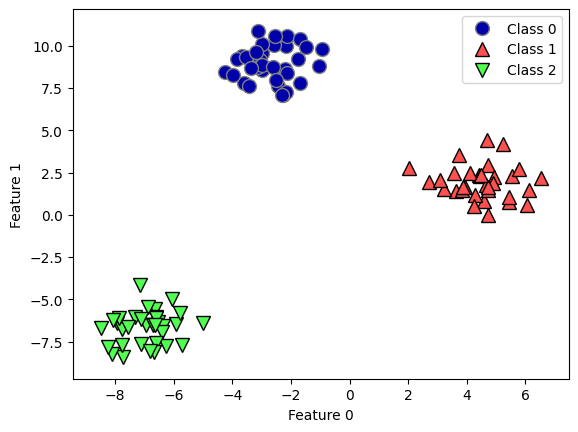

In [25]:
from sklearn.datasets import make_blobs
X, y = make_blobs(random_state=42)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(["Class 0", "Class 1", "Class 2"])

In [26]:
linear_svm = LinearSVC().fit(X, y)
print("Coefficient shape: ", linear_svm.coef_.shape) # Contains the coefficient vector for each class
print("Intercept shape: ", linear_svm.intercept_.shape) # One intercept per class

Coefficient shape:  (3, 2)
Intercept shape:  (3,)


c:\Users\Gabriel\mambaforge\envs\'iml'\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


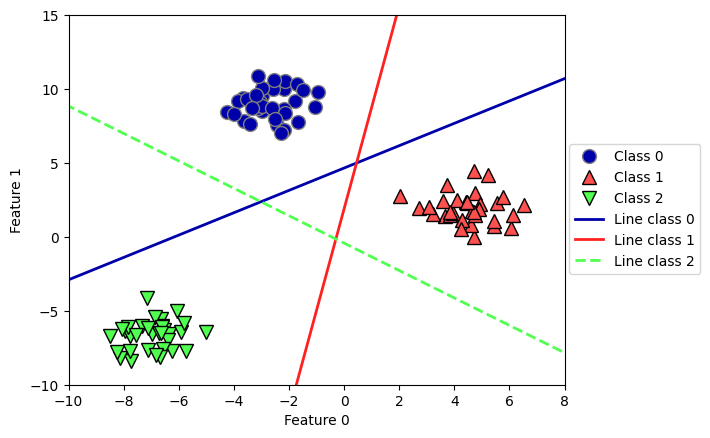

In [27]:
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
line = np.linspace(-15, 15)
for coef, intercept, color in zip(linear_svm.coef_, linear_svm.intercept_,
                                  mglearn.cm3.colors):
    plt.plot(line, -(line * coef[0] + intercept) / coef[1], c=color)
plt.ylim(-10, 15)
plt.xlim(-10, 8)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.legend(['Class 0', 'Class 1', 'Class 2', 'Line class 0', 'Line class 1',
            'Line class 2'], loc=(1.01, 0.3))
# If a point is in the triangle at the middle, it's classified to the closest line

## Naive Bayes Classifiers
- Similar to linear models, but faster
- Provide generalization performance that is worse than SVC and Logistic Regression
- Efficiency
  - Look at each feature individually and compute simple statistics
- Three NB classifiers
  - GaussianNB: 
    - Any continuous data
    - Mean and standard deviation for each feature for each class
  - BernoulliNB: 
    - Binary data
    - Count how often every feature of each class is not 0. 
  - MultinomialNB: 
    - Count data
    - Average value of each feature per class
- Prediction
  - Data is compared to statistic for each class and the best match is returned
- Strenghts
  - Multinomial/Bernoulli
    - Good for sparse data, such as text
    - Multinomial usually performs better, particulary on datasets with large number of nonzero features
  - GaussianNB
    - Good on high dimensional data
  - Good baselines when training a linear model might take long


$$p(y|x) = \frac{p(y)\prod_{i=1}^{P}p(x_{i}|y)}{\sum_{k=1}^Kp(y=k)\prod_{i=1}^{P}p(x_{i}|y=k)}$$

## Decision trees
- Learn a hierarchy of if/elses 
- Find the "best question" (feature that best splits data) that gets the true answer the most quickly
- On continuous data
  - Search on all possible thresholds $a$ and sees which best separates the classes
- Each test concerns only one feature at a time
- Prediction: Which partition the point is in
- Regression: Average of the leaf
- Tree complexity:
  - Can trained to be 100% accurate on the training set: One leaf for each data point
  - Pre-prunning: 
    - Control depth that the tree can grow
    - Max depth
    - Maximum number of leafs
    - Sklearn only implements pre-prunning
  - Post-prunning:
    - Build the tree and remove nodes that contains little information
- Feature Importance
  - How important each feature is in the decision tree (number between 0 and 1)
  - Low importance doesnt mean its uninformative, only that the tree didnt pick it
- Decision Tree Regressors are unable to extrapolate
- Strenghts:
  - Easily interpretable
  - Invariant to data scale
  - Non-linear boundaries
- Weaknessess:
  - Tend to overfit
- Parameters:
    - Tree depth
    - Number of leafs
    - ...

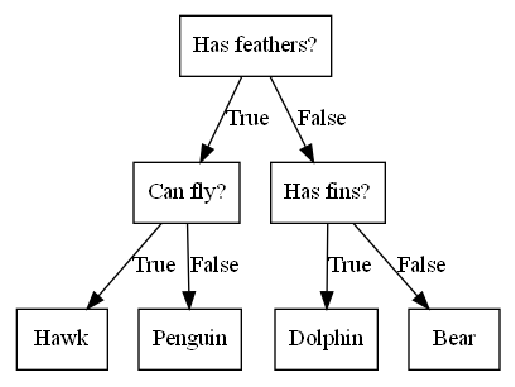

In [29]:
mglearn.plots.plot_animal_tree()

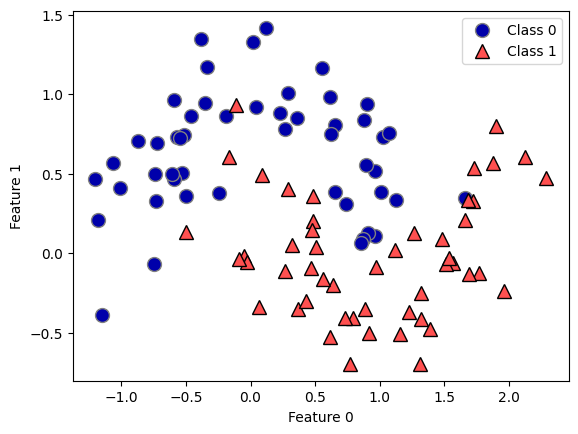

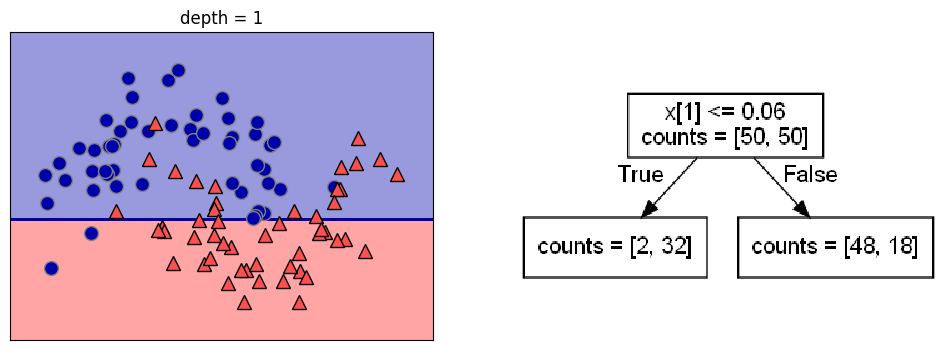

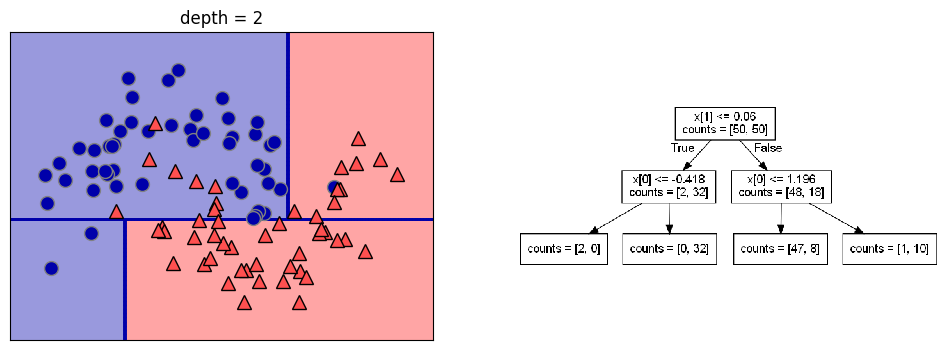

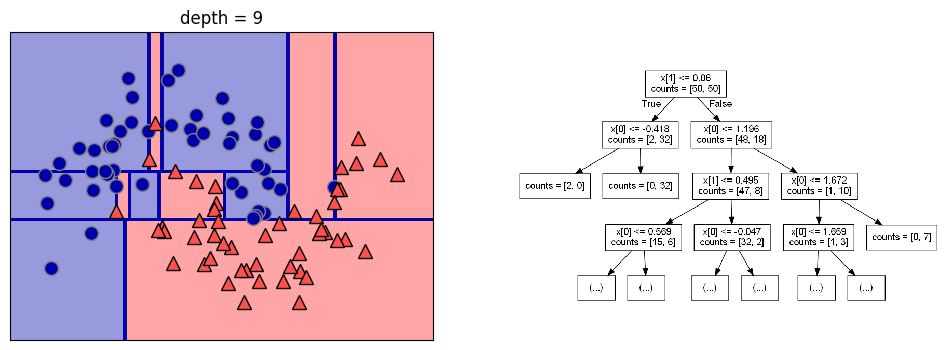

In [30]:
mglearn.plots.plot_tree_progressive()

In [31]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)
tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


In [32]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.951


In [33]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
 feature_names=cancer.feature_names, impurity=False, filled=True)

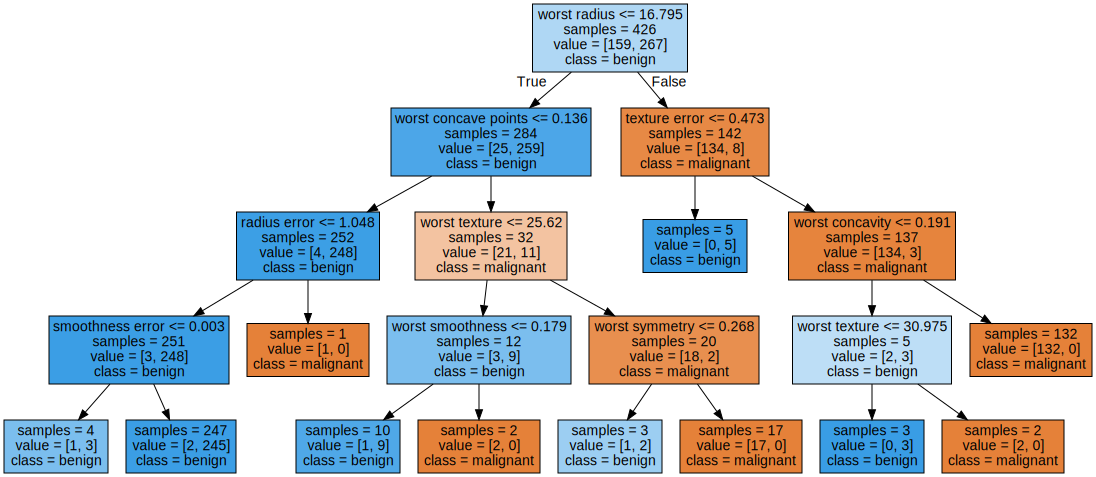

In [34]:
import graphviz

with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

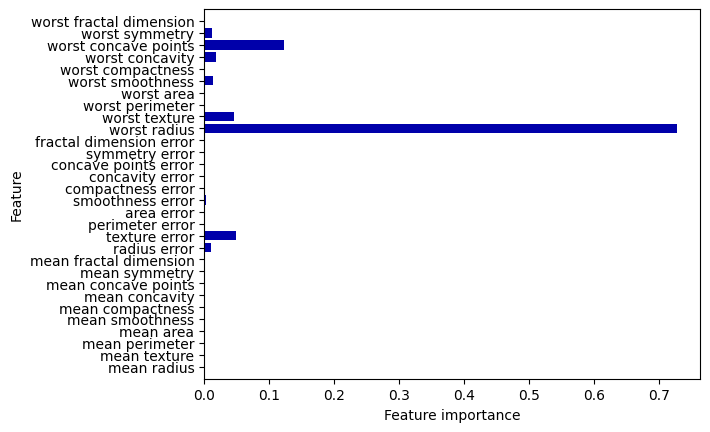

In [35]:
def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

### Random forests
- Decision tree drawback -> Prone to overfit
- Collection of decision trees
  - Reduces overfit
- Each tree should do reasonably well
- 2 ways that randomness is introduced
  - Bootstrap sample of the data (draw with replacement n times)
  - Features available at each split (best split using this random subset)
  - max_features parameter:
    - How many features it can look at each split
    - max_features = total_features -> No randomness aplied (trees will be similar)
    - max_features=1 -> Trees will be very different and the depth may need to be large to learn the data well
- Aggregation:
  - Soft voting: 
    - Probability for each output
    - Averaged across all trees
  - Hard voting:
    - Argmax for each tree
- Feature importances:
  - Aggregates the feature importances for each tree
- Strenghts:
  - Work well without heavy parameter tuning
  - Can be parallelized 
- Weaknessess:
  - Dont perform well in high dimensional, sparse data (text)

In [36]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=100, noise=0.25, random_state=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=42)

forest = RandomForestClassifier(n_estimators=5, random_state=2)
forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=2)

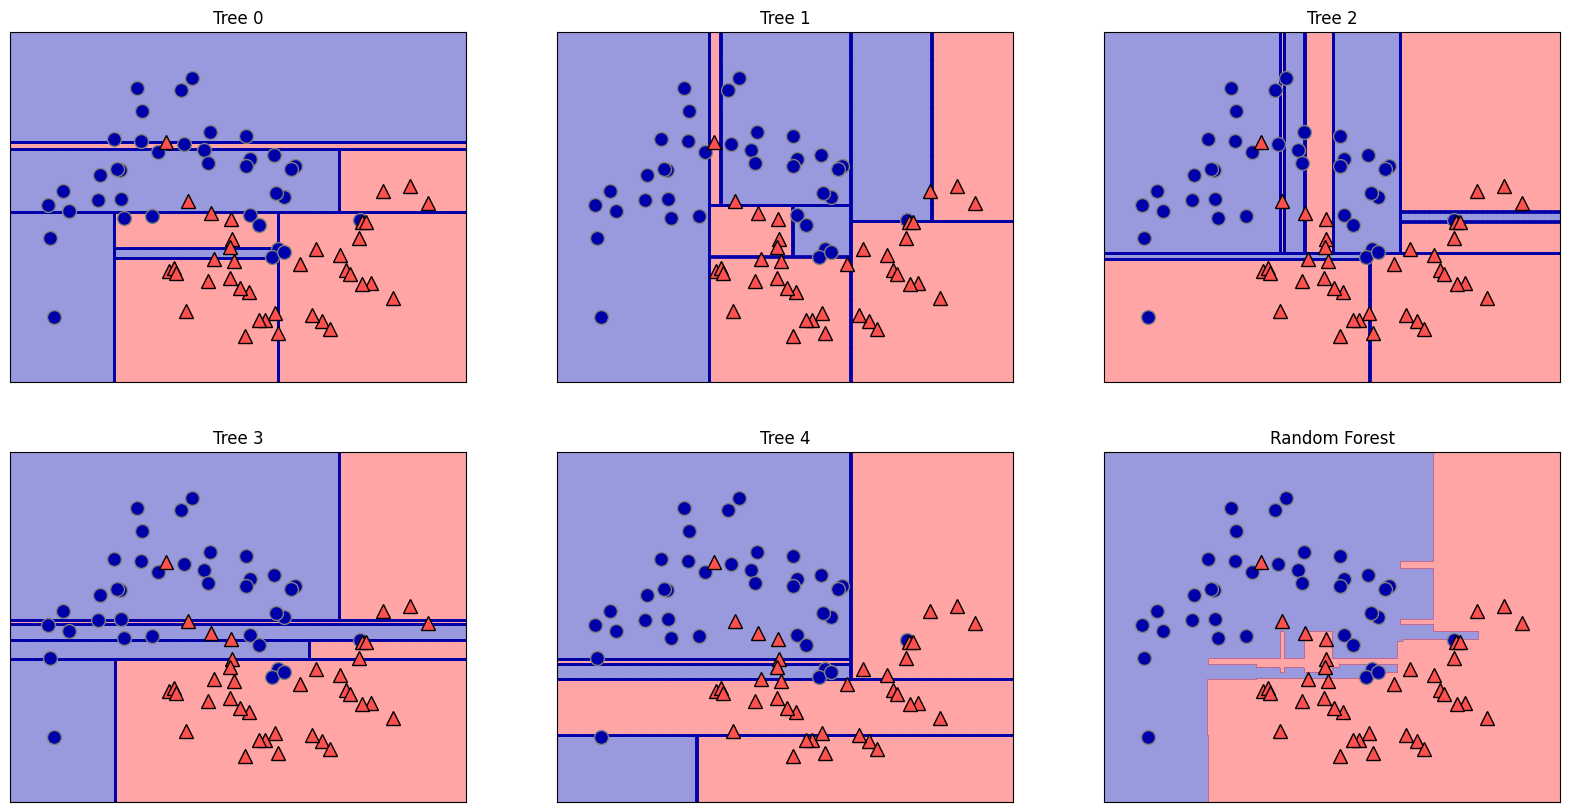

In [37]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i, (ax, tree) in enumerate(zip(axes.ravel(), forest.estimators_)):
    ax.set_title("Tree {}".format(i))
    mglearn.plots.plot_tree_partition(X_train, y_train, tree, ax=ax)
    
mglearn.plots.plot_2d_separator(forest, X_train, fill=True, ax=axes[-1, -1],
                                alpha=.4)
axes[-1, -1].set_title("Random Forest")
mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train)

In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
forest = RandomForestClassifier(n_estimators=100, random_state=0)
forest.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(forest.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.972


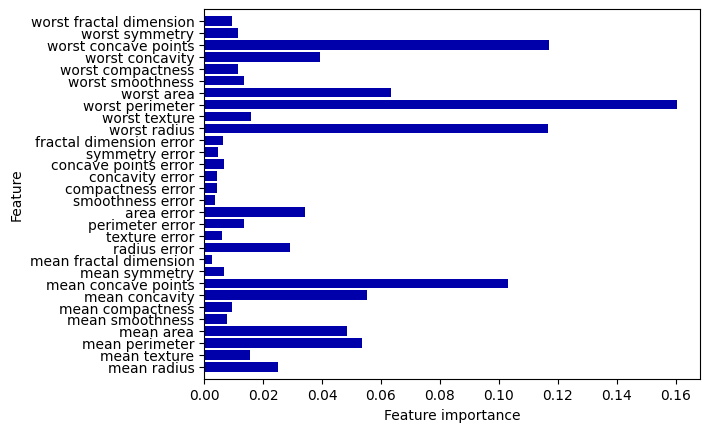

In [39]:
plot_feature_importances_cancer(forest)


### Gradient boosted regression trees
- Builds tree in a serial manner
- Often uses shallow trees
- More sensitive to parameter tuning than random forests
- learning_rate: How strongly each tree tries to correct the previous tree mistakes
- Algorithm
  - $f_1(x) \approx y$
  - $f_2(x) \approx y - f_{1}(x)$
  - $f_3(x) \approx y - f_{1}(x) - f_{2}x$
  - Gradient descent of f}unction space
  - For classification:
    - $ min_{y_{i} \in R^{N}} \sum_{i=1}^n log(exp(-y_{i}\hat{y_{i}}) + 1) $ (cross entropy using classes as $-1$ and $1$)
- Strong pruning via max_depth
- Two choices for tuning:
  - Pick number of trees and tune learning rate
  - Pick learning rate and use early stopping 
- Strenghts: 
  - Powerfull
- Weaknessess: 
  - Parameter tuning
- Other Boosting methods
  - Catboost (optimized for categorical variables)
  - XGBoost (monotonicy constraints)
  - HistGradientBoostingClassifier
  - LightGBM

In [40]:
from sklearn.ensemble import GradientBoostingClassifier
X_train, X_test, y_train, y_test = train_test_split(
 cancer.data, cancer.target, random_state=0)
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.965


In [41]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.991
Accuracy on test set: 0.972


In [42]:
gbrt = GradientBoostingClassifier(random_state=0, learning_rate=0.01)
gbrt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(gbrt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbrt.score(X_test, y_test)))

Accuracy on training set: 0.988
Accuracy on test set: 0.958


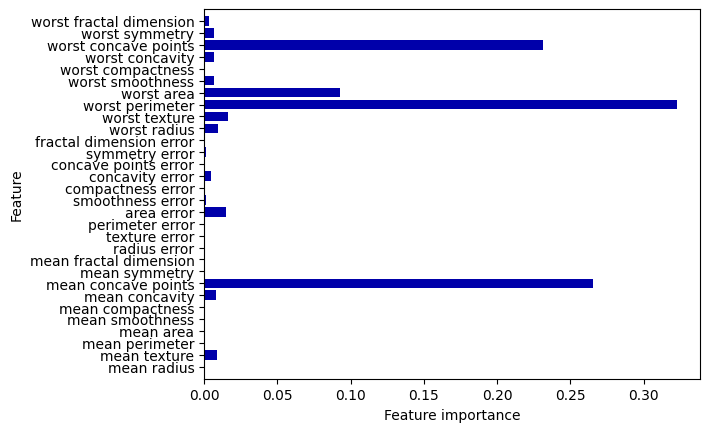

In [43]:
gbrt = GradientBoostingClassifier(random_state=0, max_depth=1)
gbrt.fit(X_train, y_train)

plot_feature_importances_cancer(gbrt)

### Kernelized Suport Vector Machines
- Go from linear models to more complex ones
- Keeps convexity (ease of optimization)
- Generalize the concept of feature engineering
- Kernel trick:
  - Way to learn higher-dimensional space without computing the new representation
  - Works directly by computing the distance between the augmented data points
  - Two ways normally used
    - Polynomial kernel:
      - Computes all features up to a degree
      - RBF: Infinite dimensional feature space
        - Considers all possible polynomials of all degrees, but the importance for features decreases in higher degrees
  - Training:
    - SVMs learn how important each point is in representing the boundary between two classes
    - Suport vectors: Few data points that lie in the boundary between two classes
  - Prediction:
    - New point distance to each of this support vectors
    - Importance of each support vector is in the coef_ attribute
- Parameters:
  - $\gamma$: Width of gaussian kernel (Large means that many points are considered close by)
  - $C$: Regularization parameter (Small C mean restricted model)
- Common scaling method for SVMs: MinMaxScaler
- Strenghts:
  - Works well on both high and low dimensional data
  - Non-linear boundaries
- Weaknesses:
  - Dont scale well with large number of training points
  - Carefull preprocessing and scaling
  - Difficult to understand
  - Dont work very well with mixed data
- Parameters:
  - C and $\gamma$: Should be adjusted together
  

Text(0, 0.5, 'Feature 1')

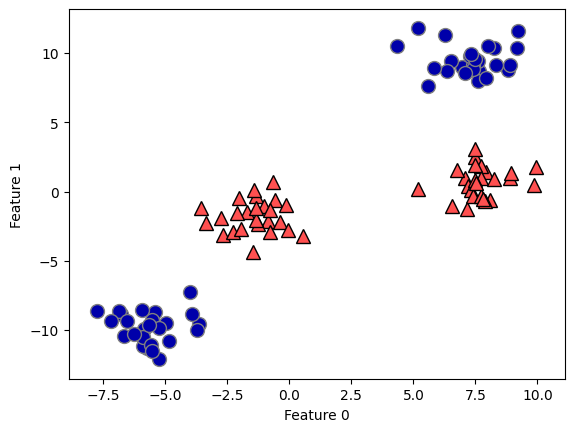

In [44]:
X, y = make_blobs(centers=4, random_state=8)
y = y % 2

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

c:\Users\Gabriel\mambaforge\envs\'iml'\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Gabriel\mambaforge\envs\'iml'\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Text(0, 0.5, 'Feature 1')

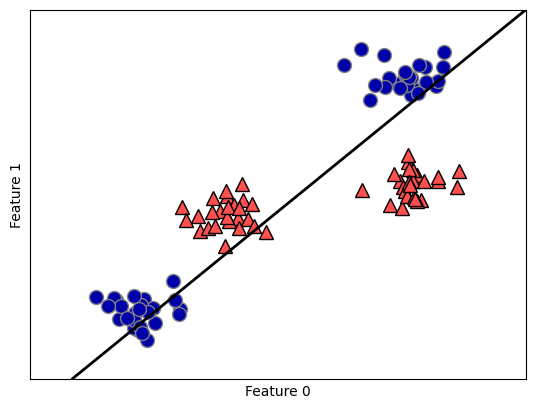

In [45]:
from sklearn.svm import LinearSVC
linear_svm = LinearSVC().fit(X, y)

mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [47]:
X_new = np.hstack([X, X[:, 1:] ** 2])


from mpl_toolkits.mplot3d import Axes3D, axes3d
figure = plt.figure()
# visualize in 3D
ax = Axes3D(figure, elev=-152, azim=-26)
# plot first all the points with y==0, then all with y == 1
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

C:\Users\Gabriel\AppData\Local\Temp\ipykernel_7636\3742894372.py:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_7636\3742894372.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',


Text(0.5, 0, 'feature1 ** 2')

<Figure size 640x480 with 0 Axes>

In [48]:
linear_svm_3d = LinearSVC().fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# show linear decision boundary
figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=mglearn.cm2, s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=mglearn.cm2, s=60, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature1")
ax.set_zlabel("feature1 ** 2")

c:\Users\Gabriel\mambaforge\envs\'iml'\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Gabriel\mambaforge\envs\'iml'\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_7636\1615430027.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
C:\Users\Gabriel\AppData\Local\Temp\ipykernel_7636\1615430027.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',


Text(0.5, 0, 'feature1 ** 2')

<Figure size 640x480 with 0 Axes>

Text(0, 0.5, 'Feature 1')

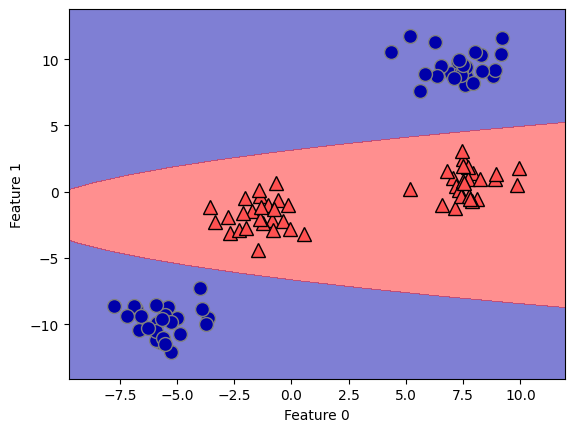

In [49]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=mglearn.cm2, alpha=0.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

Text(0, 0.5, 'Feature 1')

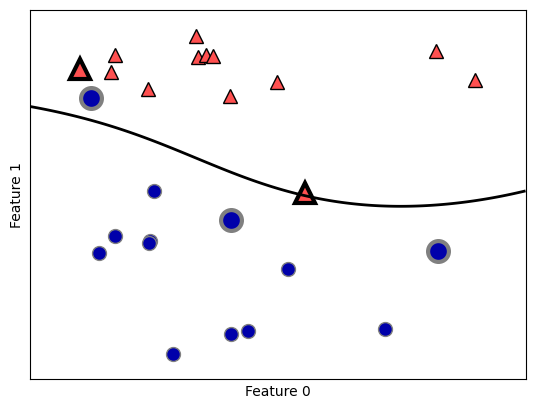

In [50]:
from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()                                                                  
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
# plot support vectors
sv = svm.support_vectors_
# class labels of support vectors are given by the sign of the dual coefficients
sv_labels = svm.dual_coef_.ravel() > 0
mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

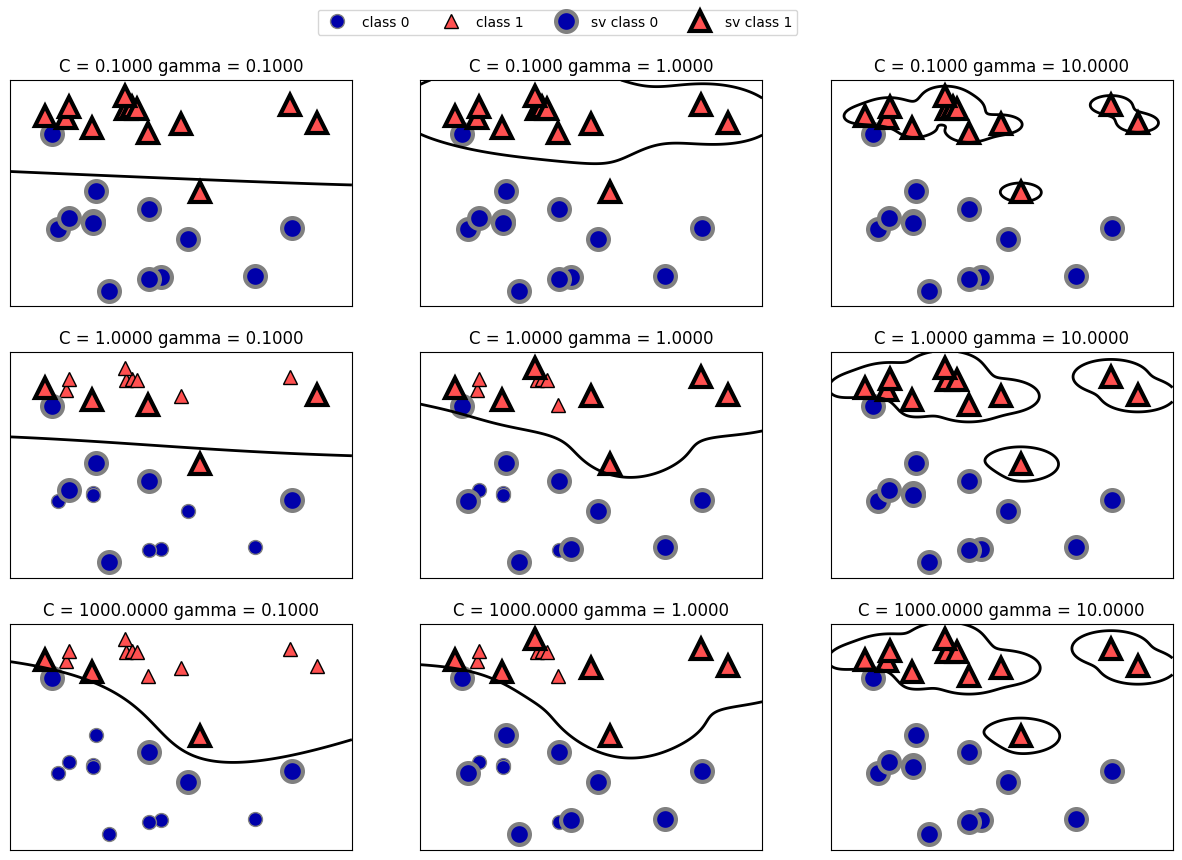

In [51]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "sv class 0", "sv class 1"],
                  ncol=4, loc=(.9, 1.2))

### Uncertainty estimates:
- How certain(uncertain) the class is in it estimates
- Two function in sklearn
  - decision_function:
    - Binary case: One floating point number
    - How strongs the model believe to be positive
    - Recover the decision by looking at the sign
  - Probabilities:
    - Predicted class is the one above 0.5
    - Calibrated model:
      - Reported uncertainty matches how corrected it its
      - A prediction made with 70% certainty would be correct 70% of the time
    

In [52]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise=0.25, factor=0.5, random_state=1)

# we rename the classes "blue" and "red" for illustration purposes:
y_named = np.array(["blue", "red"])[y]

# we can call train_test_split with arbitrarily many arrays;
# all will be split in a consistent manner
X_train, X_test, y_train_named, y_test_named, y_train, y_test = \
    train_test_split(X, y_named, y, random_state=0)

# build the gradient boosting model
gbrt = GradientBoostingClassifier(random_state=0)
gbrt.fit(X_train, y_train_named)

GradientBoostingClassifier(random_state=0)

In [53]:
print("X_test.shape:", X_test.shape)
print("Decision function shape:",
      gbrt.decision_function(X_test).shape)

X_test.shape: (25, 2)
Decision function shape: (25,)


In [54]:
print("Decision function:", gbrt.decision_function(X_test)[:6])


Decision function: [ 4.136 -1.678 -3.951 -3.626  4.29   3.662]


In [55]:
print("Thresholded decision function:\n",
      gbrt.decision_function(X_test) > 0)
print("Predictions:\n", gbrt.predict(X_test))

Thresholded decision function:
 [ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
Predictions:
 ['red' 'blue' 'blue' 'blue' 'red' 'red' 'blue' 'red' 'red' 'red' 'blue'
 'red' 'red' 'blue' 'red' 'blue' 'blue' 'blue' 'red' 'red' 'red' 'red'
 'red' 'blue' 'blue']


In [56]:
greater_zero = (gbrt.decision_function(X_test) > 0).astype(int)
# use 0 and 1 as indices into classes_
pred = gbrt.classes_[greater_zero]
# pred is the same as the output of gbrt.predict
print("pred is equal to predictions:",
      np.all(pred == gbrt.predict(X_test)))

pred is equal to predictions: True


In [57]:
decision_function = gbrt.decision_function(X_test)
print("Decision function minimum: {:.2f} maximum: {:.2f}".format(
      np.min(decision_function), np.max(decision_function)))

Decision function minimum: -7.69 maximum: 4.29


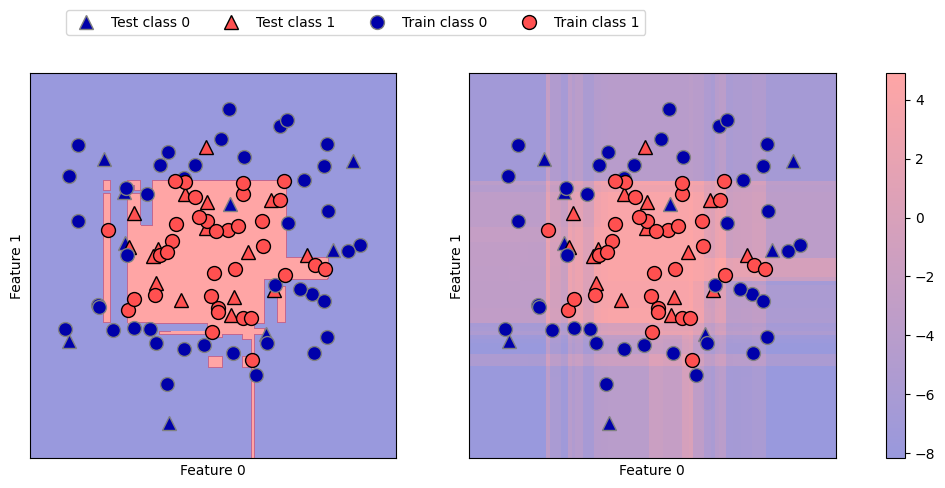

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
mglearn.tools.plot_2d_separator(gbrt, X, ax=axes[0], alpha=.4,
                                fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(gbrt, X, ax=axes[1],
                                            alpha=.4, cm=mglearn.ReBl)

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))

In [59]:
print("Shape of probabilities:", gbrt.predict_proba(X_test).shape)


Shape of probabilities: (25, 2)


In [60]:

# show the first few entries of predict_proba
print("Predicted probabilities:")
print(gbrt.predict_proba(X_test[:6]))


Predicted probabilities:
[[0.016 0.984]
 [0.843 0.157]
 [0.981 0.019]
 [0.974 0.026]
 [0.014 0.986]
 [0.025 0.975]]


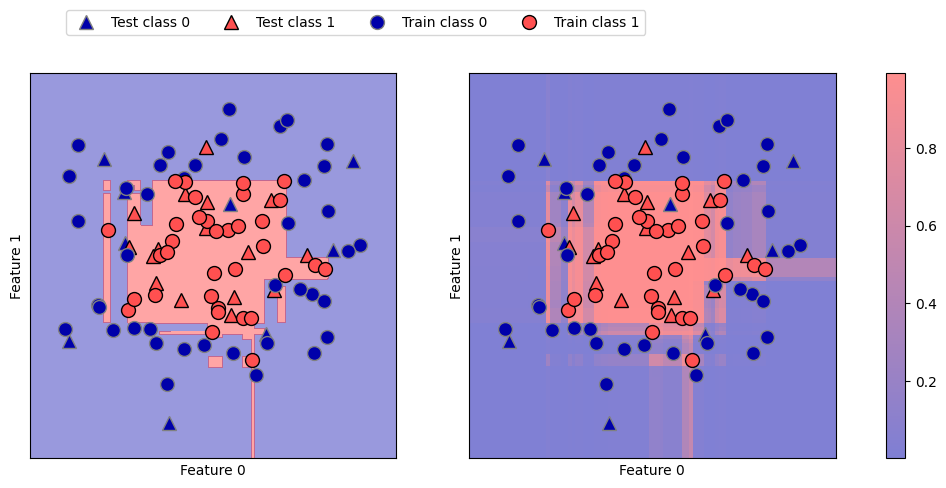

In [62]:
fig, axes = plt.subplots(1, 2, figsize=(13, 5))
    
mglearn.tools.plot_2d_separator(
    gbrt, X, ax=axes[0], alpha=.4, fill=True, cm=mglearn.cm2)
scores_image = mglearn.tools.plot_2d_scores(
    gbrt, X, ax=axes[1], alpha=.5, cm=mglearn.ReBl, function='predict_proba')

for ax in axes:
    # plot training and test points
    mglearn.discrete_scatter(X_test[:, 0], X_test[:, 1], y_test,
                             markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:, 0], X_train[:, 1], y_train,
                             markers='o', ax=ax)
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
# don't want a transparent colorbar
cbar = plt.colorbar(scores_image, ax=axes.tolist())
cbar.set_alpha(1)
axes[0].legend(["Test class 0", "Test class 1", "Train class 0",
                "Train class 1"], ncol=4, loc=(.1, 1.1))